In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

Uploading the required csv file

In [ ]:
from google.colab import files
up=files.upload()

Saving chat_dataset.csv to chat_dataset.csv


Reading the csv file contents

In [ ]:
data=pd.read_csv('chat_dataset.csv')

Displaying first few rows

In [ ]:
data.head()

,message,sentiment
0,I really enjoyed the movie,positive
1,The food was terrible,negative
2,I'm not sure how I feel about this,neutral
3,The service was excellent,positive
4,I had a bad experience,negative


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   message    584 non-null    object
 1   sentiment  584 non-null    object
dtypes: object(2)
memory usage: 9.2+ KB


Accessing the sentiment column and counting the number of times each type of category has occured

In [ ]:
sentiment_counts=data['sentiment'].value_counts()
print(sentiment_counts)

sentiment
neutral     259
positive    178
negative    147
Name: count, dtype: int64


Importing the regular expansion module for manipulating strings

In [ ]:
import re

Used for changing the messages in the message column to lower case letters and printing

In [ ]:
def preprocess_text(text):
    text=text.lower()
    return text
data['cleaned_message'] = data['message'].apply(preprocess_text)
print(data.columns)
print(data['cleaned_message'])


Index(['message', 'sentiment', 'cleaned_message'], dtype='object')
0                             i really enjoyed the movie
1                                  the food was terrible
2                     i'm not sure how i feel about this
3                              the service was excellent
4                                 i had a bad experience
                             ...                        
579    i have to cancel my vacation plans because i c...
580    my computer crashed and i lost all my importan...
581    i got into a car accident and my car is totale...
582    i have a cold and can't stop coughing. it's re...
583    i just found out my ex is dating someone new. ...
Name: cleaned_message, Length: 584, dtype: object


Converting string to machine readable format(bag of words) using CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(data['cleaned_message'])
print(X.shape)
#584:how many messages have been processed
#684:no of unique words

(584, 684)


Testing and Training of data set.
Here the 30% of data is used for test data and the rest 70% is used for training data.
Randome state random number used for train-test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, data['sentiment'], test_size=0.3, random_state=98)


Building a classification model using logistic regression example

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
model=LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.69      0.73      0.71        37
     neutral       0.89      0.88      0.88        80
    positive       0.83      0.81      0.82        59

    accuracy                           0.82       176
   macro avg       0.80      0.81      0.80       176
weighted avg       0.83      0.82      0.82       176

Accuracy: 0.8238636363636364


RESULT

Negativet: moderate
Neutral: strong
Positive: good,but less than neutral

Building classification model using decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
dt_model=DecisionTreeClassifier(max_depth=10, random_state=54)

In [ ]:
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, random_state=54)

In [ ]:
y_pred=dt_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.78      0.38      0.51        37
     neutral       0.96      0.65      0.78        80
    positive       0.53      0.93      0.67        59

    accuracy                           0.69       176
   macro avg       0.76      0.65      0.65       176
weighted avg       0.78      0.69      0.69       176

Accuracy: 0.6875


There are pre trained word embeddings like Glove

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

In [ ]:
data=pd.read_csv('chat_dataset.csv')


In [ ]:
def preprocess_text(text):
    text = text.lower()
    return text
data['cleaned_message'] = data['message'].apply(preprocess_text)


Tokenising words

In [ ]:
data['tokenized']=data['cleaned_message'].apply(lambda x: x.split())

Train Word2Vec Model

In [ ]:
w2v = Word2Vec(sentences=data['tokenized'], vector_size=200, window=9, min_count=2, sg=9)

Visual representation of sentiment analysis model

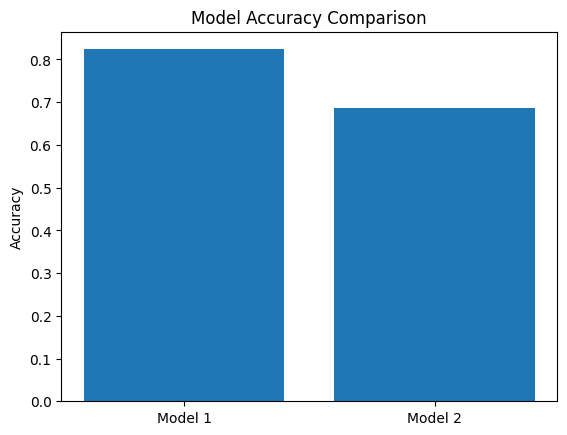

In [ ]:
import matplotlib.pyplot as plt
results={'Model 1':0.8238636363636364,'Model 2': 0.6875}
model_names=list(results.keys())
accuracies=list(results.values())
plt.bar(model_names, accuracies)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()
